In [33]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [51]:
user_behavior = pd.read_csv("data\\steam-200k.csv", header=None).drop(columns=4)
user_behavior.columns = ["user_id", "game_name", "behavior", "amount"]

In [52]:
# get only user plays
user_plays = user_behavior[user_behavior["behavior"] == "play"].drop(columns="behavior")

In [53]:
# make sure each user only has one play amount for each game
user_plays = user_plays.groupby(["user_id", "game_name"]).sum().reset_index()

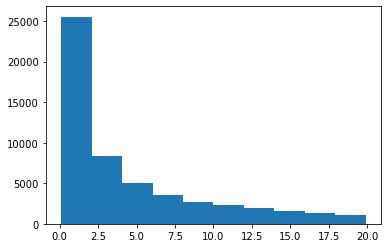

In [54]:
plt.hist(user_plays.amount[user_plays.amount < 20])
plt.show()

In [55]:
# only keep play times of at least 1 hour
user_plays = user_plays[user_plays['amount'] >= 1]

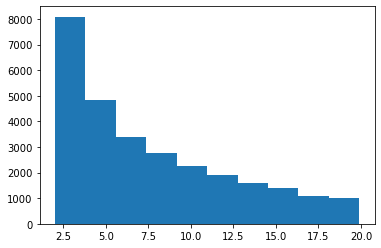

In [50]:
plt.hist(user_plays.amount[user_plays.amount < 20])
plt.show()

In [28]:
game_codings = pd.DataFrame(user_plays['game_name'].unique()).reset_index()
game_codings.columns = ["game_id", "game_name"]
game_codings

,game_id,game_name
0,0,Alien Swarm
1,1,Cities Skylines
2,2,Deus Ex Human Revolution
3,3,Portal 2
4,4,Age of Empires II HD Edition
...,...,...
3069,3069,The Secret of Tremendous Corporation
3070,3070,Genesis Online
3071,3071,Paint the Town Red
3072,3072,Secret Files Tunguska


In [7]:
up = user_plays.merge(game_codings, on="game_name")
up.drop(columns="game_name")

,user_id,amount,game_id
0,5250,4.9,0
1,298950,1.6,0
2,975449,9.8,0
3,1950243,3.8,0
4,2259650,3.2,0
...,...,...,...
53689,298431593,1.3,3069
53690,298493475,1.8,3070
53691,300199064,2.1,3071
53692,306839937,7.9,3072


In [8]:
users_sorted = user_plays.groupby("user_id").count().reset_index().sort_values("amount", ascending=False)
games_sorted = user_plays.groupby("game_name").count().reset_index().sort_values("amount", ascending=False)

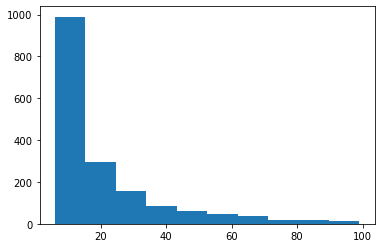

In [9]:
plt.hist(users_sorted['amount'][(users_sorted['amount'] > 5) & (users_sorted['amount'] < 100)])
plt.show()

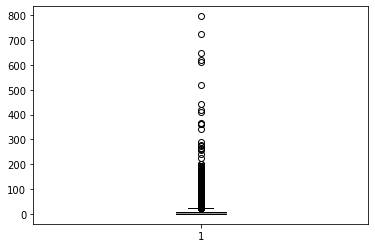

In [10]:
plt.boxplot(games_sorted['amount'][games_sorted['amount'] < 1000])
plt.show()

In [11]:
print(user_plays.merge(users_sorted[users_sorted['amount'] >= 5]['user_id'], on='user_id').shape)
print(user_plays.shape)

(42915, 3)
(53694, 3)


In [12]:
games_sorted['amount'][(games_sorted['amount'] > 1000)]

781     3835
2561    1753
567     1324
Name: amount, dtype: int64

In [13]:
print(user_plays.merge(games_sorted[games_sorted['amount'] <= 1000]['game_name']).shape)
print(user_plays.shape)

(46782, 3)
(53694, 3)


In [14]:
games_sorted[(games_sorted['amount'] > 1000)]['game_name'].tolist()

['Dota 2', 'Team Fortress 2', 'Counter-Strike Global Offensive']

In [15]:
user_plays

,user_id,game_name,amount
0,5250,Alien Swarm,4.9
1,5250,Cities Skylines,144.0
2,5250,Deus Ex Human Revolution,62.0
4,5250,Portal 2,13.6
6,76767,Age of Empires II HD Edition,13.1
...,...,...,...
70468,309404240,Mitos.is The Game,2.2
70469,309404240,Team Fortress 2,2.2
70471,309404240,Unturned,13.0
70473,309554670,Mitos.is The Game,5.9


In [16]:
user_plays = user_plays.merge(user_plays.groupby('game_name').agg({'amount':'min'}).reset_index(), on='game_name')
user_plays = user_plays.merge(user_plays.groupby('game_name').agg({'amount_x':'max'}).reset_index(), on='game_name')

In [17]:
user_plays.columns = ['user_id', 'game_name', 'amount', 'min', 'max']
user_plays['norm_amount'] = (user_plays['amount'] - user_plays['min'].apply(np.floor)) / (user_plays['max'] - user_plays['min'].apply(np.floor)) 

In [18]:
user_plays.drop(columns=['min', 'max'])

,user_id,game_name,amount,norm_amount
0,5250,Alien Swarm,4.9,0.047561
1,298950,Alien Swarm,1.6,0.007317
2,975449,Alien Swarm,9.8,0.107317
3,1950243,Alien Swarm,3.8,0.034146
4,2259650,Alien Swarm,3.2,0.026829
...,...,...,...,...
53689,298431593,The Secret of Tremendous Corporation,1.3,1.000000
53690,298493475,Genesis Online,1.8,1.000000
53691,300199064,Paint the Town Red,2.1,1.000000
53692,306839937,Secret Files Tunguska,7.9,1.000000


In [19]:
user_plays[(user_plays['game_name'] == 'Alien Swarm') & (user_plays['amount'] > 83)].head(52)

,user_id,game_name,amount,min,max,norm_amount


In [20]:
X_train, X_test = train_test_split(user_plays, test_size=0.25)

In [21]:
X_test

,user_id,game_name,amount,min,max,norm_amount
14488,101212067,Sid Meier's Civilization V,55.0,1.0,11754.0,0.004595
24196,152959594,Dota 2,10.4,1.0,10442.0,0.000900
32285,17530772,Call of Duty 4 Modern Warfare,4.3,1.0,113.0,0.029464
41119,202595940,Football Manager 2015,6.4,1.5,2503.0,0.002158
20779,121497634,Killing Floor,16.4,1.0,1499.0,0.010280
...,...,...,...,...,...,...
47027,38049880,Ace of Spades,10.5,1.1,65.0,0.148438
7762,15305418,Batman Arkham Origins,5.2,1.0,287.0,0.014685
9624,83497449,Don't Starve,6.2,1.0,608.0,0.008567
53390,138941587,Tales from Space Mutant Blobs Attack,3.6,3.6,3.6,1.000000


In [22]:
X_train

,user_id,game_name,amount,min,max,norm_amount
52245,71527252,8BitBoy,24.0,1.6,24.0,1.000000
32664,212426459,Dirty Bomb,10.7,1.0,162.0,0.060248
2972,32102983,Counter-Strike Global Offensive,29.0,1.0,4659.0,0.006011
38880,96588736,METAL GEAR RISING REVENGEANCE,6.0,1.2,47.0,0.108696
3169,78341587,Counter-Strike Global Offensive,8.1,1.0,4659.0,0.001524
...,...,...,...,...,...,...
40583,135400225,Project CARS,7.3,1.3,40.0,0.161538
47436,29302014,FINAL FANTASY VIII,10.9,1.3,185.0,0.053804
21850,50967861,Football Manager 2009,18.8,1.6,1885.0,0.009448
34458,65173746,RaceRoom Racing Experience,1.5,1.2,201.0,0.002500
